# Planejamento da Solução (IOT)

###### - Input (Entrada).
    a - Problema de Negocio
    b - Questões que serão respondidas
    c - Dados de entrada / Fonte  de Dados
    
###### - Output( Saída ).
    a - Anásile de dados
    b - Algoritmo de Machine Learning treinado
    c - Dashboard
    
###### - Tasks (Tarefas).
    a - Plano de Execução
    b - Ferramentas
    

# PA005 : High Value Customer Identification (Insiders)

## 0.0. Planejamento da solução (IOT)

### Input - Entrada

1. Problema de Negócio
    - Selecionar os clientes mais valiosos para integrar um programa de Fidelização
    
2. Conjunto de dados
    - Vendas de um e-commerce online, durante o periodo de um ano.

### Output - Saída

1. A indicação das pessoas que farão parte do programa de Insiders
 - Lista:   client_id | is_insider|
    
               10323 | yes/1
               32413 | no/0

### Tasks - Tarefas

1. Quem são as pessoas elegíveis para participar do programa de Insiders ?
    - O que é ser elegivel? O que são clientes de maior "Valor".
        
        - Faturamento
        
            - Alto Ticket Médio
            - Alto LTV ( Life time value )
            - Baixa Recência
            - Alto basket size
            - Baixa probabilidade de churn.
            - Previsão de LTV
            - Alta propensão de compra.
            
        - Custo
        
            - Baixo taxa de devolução
            
        - Experiência de compra
        
            - Média alta das avaliações
    
2. Quantos Clientes farão parte do grupo ?
    - Número total de clientes
    - % de Insiders
    
3. Quais as principais caracteristicas desses clientes ?
    - Escrever caracteristivas do cliente
    
        - Idade
        - Localização
        
    - Escrever caracteristicas de consumo
    
        - Atributos da clusterização
        
4. Qual a porcentagem de contribuição do faturamento desse grupo para os proximos mese ?
    - Faturamento total do ano
    - Faturamento do grupo Insiders
    
5. Qual a expectativa de faturamento desse grupo para os proximos meses ?
    - LTV do grupo Insiders
    - Analise de Cohort
    
6. Quais as condições para uma pessoa ser elegivel ao Insiders ?
    - Definir a periodicidade (1 mes, 3 meses)
    - A pessoa precisa ser similar ou pareceido com uma pessoa do grupo.
    
7. Quais as condições para uma pessoa ser removida do Insiders ?
    - Definir a periodicidade (1 mes, 3 meses)
    - A pessoa precisa ser desimilar ou não pareceido com uma pessoa do grupo.
    
8. Qual a garantia que o programa Insiders é melhor que o restante da base?
    - Teste A/B
    - Teste A/B Bayesiano
    - Teste de hipóteses.
    
9. Quais ações o time de marketing pode realizar para aumentar o faturamento?
    - Desconto
    - Preferencia de compra
    - Frete
    - Visista a empresa

In [1]:
pip install tensorflow

  Using cached grpcio-1.54.2-cp39-cp39-win_amd64.whl (4.1 MB)
  Using cached google_auth-2.19.1-py2.py3-none-any.whl (181 kB)
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.42.0
    Uninstalling grpcio-1.42.0:
      Successfully uninstalled grpcio-1.42.0
  Attempting uninstall: google-auth
    Found existing installation: google-auth 1.35.0
    Uninstalling google-auth-1.35.0:
      Successfully uninstalled google-auth-1.35.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-api-core 1.25.1 requires google-auth<2.0dev,>=1.21.1, but you have google-auth 2.19.1 which is incompatible.
google-cloud-core 1.7.1 requires google-auth<2.0dev,>=1.24.0, but you have google-auth 2.19.1 which is incompatible.
google-cloud-storage 1.31.0 requires google-auth<2.0dev,>=1.11.0, but you have google-auth 2.19.1 which is incompatible.


# <font color='red'> 1.0. Imports </font>

In [2]:
import pandas as pd
import seaborn as sns
import inflection
import warnings


#import umap.umap_ as umap
from sklearn import cluster as c
from matplotlib import pyplot as plt
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from IPython.display import HTML
from sklearn import metrics as m

from plotly import express as px

## 0.1. Help Functions

In [3]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
warnings.filterwarnings( 'ignore' )    

## 0.2 Load Dataset

In [4]:
df_raw = pd.read_csv('Ecommerce.csv',encoding='unicode_escape')

In [5]:
df_raw

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,7-Dec-17,0.85,12680.0,France,NaN
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,7-Dec-17,2.10,12680.0,France,NaN
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,7-Dec-17,4.15,12680.0,France,NaN
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,7-Dec-17,4.15,12680.0,France,NaN


In [6]:
#Excluindo a coluna unnamed
df_raw.drop(columns=['Unnamed: 8'], axis=1, inplace=True)

# <font color='red'> 2.0. Descrição dos dados. </font>

In [7]:
df1 = df_raw.copy()

## 2.1. Rename Columns

In [8]:
df_raw.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [9]:
cols_old = ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate','UnitPrice', 'CustomerID', 'Country']

snakecase = lambda x: inflection.underscore( x )

cols_new = list( map( snakecase, cols_old ) )

# rename
df1.columns = cols_new

In [10]:
df1.sample()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
46662,540356,22739,RIBBON REEL CHRISTMAS SOCK BAUBLE,3,4-Jan-17,2.51,NaN,United Kingdom


## 2.2. Data Dimensions

In [11]:
print(f'Numero de linhas: {df1.shape[0]}')
print(f'Numero de colunas: {df1.shape[1]}')

Numero de linhas: 541909
Numero de colunas: 8


## 2.3. Data types

In [12]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

In [13]:
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


## 2.4. Check NA

In [14]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## 2.5. Replace NA

In [15]:
df1 = df1.dropna(subset=['description', 'customer_id'])

print(f'{ (1 -df1.shape[0]/ df_raw.shape[0]) * 100:.2f} % dos dados foram removidos')

24.93 % dos dados foram removidos


In [16]:
df1.isna().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

## 2.6. Change dtypes

In [17]:
#invoice_date
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'], format='%d-%b-%y')
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850.0,United Kingdom


In [18]:
#customer_id
df1['customer_id'] = df1['customer_id'].astype(int)
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850,United Kingdom


In [19]:
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id              int32
country                 object
dtype: object

## 2.7. Descriptive Statistics

# <font color='red'> 3.0. Feature Enginering </font>

In [20]:
df2 = df1.copy()

## 3.1. Feature Creation

In [21]:
df_ref = df2[['customer_id']].drop_duplicates(ignore_index=True)
df_ref.head()

,customer_id
0,17850
1,13047
2,12583
3,13748
4,15100


##### Faturamento

In [22]:
#Faturamento = Quantity * price
df2['gross_revenue'] = df2['quantity'] * df2['unit_price']


#Monetary
df2[['customer_id', 'gross_revenue']].head()


df_monetary = df2[['customer_id', 'gross_revenue']].groupby('customer_id').sum().reset_index()

#merge com o df_ref

df_ref = pd.merge(df_ref, df_monetary, on='customer_id', how='left')
df_ref.head()

,customer_id,gross_revenue
0,17850,5288.63
1,13047,3079.10
2,12583,7187.34
3,13748,948.25
4,15100,635.10


### Recency

In [23]:
#Recency
df_recency = df2[['customer_id', 'invoice_date']].groupby('customer_id').max().reset_index()
df_recency['recency_days'] = (df2['invoice_date'].max() - df_recency['invoice_date']).dt.days
df_recency = df_recency[['customer_id', 'recency_days']].copy()


df_ref = pd.merge(df_ref, df_recency, on='customer_id', how='left')
df_ref.head()


,customer_id,gross_revenue,recency_days
0,17850,5288.63,302
1,13047,3079.10,31
2,12583,7187.34,2
3,13748,948.25,95
4,15100,635.10,330


### Frequency


In [24]:
#Frequency

df2[['customer_id', 'invoice_no']].head()

,customer_id,invoice_no
0,17850,536365
1,17850,536365
2,17850,536365
3,17850,536365
4,17850,536365


In [25]:
df2[['customer_id', 'invoice_no']].drop_duplicates().head()

,customer_id,invoice_no
0,17850,536365
7,17850,536366
9,13047,536367
21,13047,536368
25,13047,536369


In [26]:
df_frequency = df2[['customer_id', 'invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index()
df_frequency.head()

,customer_id,invoice_no
0,12346,2
1,12347,7
2,12348,4
3,12349,1
4,12350,1


In [27]:
df_ref = pd.merge(df_ref, df_frequency, on='customer_id', how='left')
df_ref.head()

,customer_id,gross_revenue,recency_days,invoice_no
0,17850,5288.63,302,35
1,13047,3079.10,31,18
2,12583,7187.34,2,18
3,13748,948.25,95,5
4,15100,635.10,330,6


### AVG Ticket

In [28]:
df_avg_ticket = df2[['customer_id', 'gross_revenue']].groupby('customer_id').mean().reset_index().rename(columns={'gross_revenue' : 'avg_ticket'})
df_avg_ticket.head()


,customer_id,avg_ticket
0,12346,0.000000
1,12347,23.681319
2,12348,57.975484
3,12349,24.076027
4,12350,19.670588


In [29]:
df_ref = pd.merge(df_ref, df_avg_ticket, on='customer_id', how='left')
df_ref.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket
0,17850,5288.63,302,35,16.950737
1,13047,3079.10,31,18,15.709694
2,12583,7187.34,2,18,28.634821
3,13748,948.25,95,5,33.866071
4,15100,635.10,330,6,105.850000


# <font color='red'> 4.0. Filtragem de Variáveis </font>

In [30]:
df3 = df_ref.copy()

# <font color='red'> 5.0. EDA </font>

In [31]:
df4 = df3.copy()

# <font color='red'> 6.0. Data Preparation </font>

In [32]:
df5 = df4.copy()

# <font color='red'> 7.0. Feature Selection </font>

In [33]:
df6 = df5.copy()

# <font color='red'> 8.0. Hyperparameter Fine-Tunning </font>

In [34]:
X = df6.drop(columns = ['customer_id'])

In [35]:
clusters = [2, 3, 4, 5, 6, 7]

## 8.1. Within-Cluster Sum of Square (WSS)

Text(0.5, 1.0, 'WSS vs K')

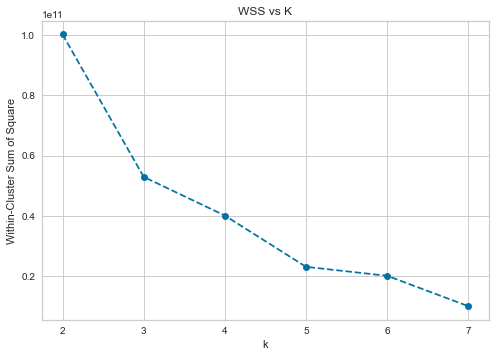

In [36]:
wss = []
for k in clusters:
    #model definition
    kmeans = c.KMeans( init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42)
    
    #model training
    kmeans.fit(X)
    
    #validation
    wss.append(kmeans.inertia_)
    
#plot wss
plt.plot(clusters, wss, linestyle='--', marker='o', color='b')
plt.xlabel('k')
plt.ylabel('Within-Cluster Sum of Square')
plt.title('WSS vs K')

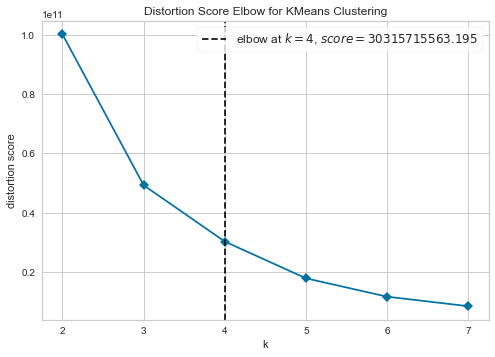

In [37]:
kmeans = KElbowVisualizer(c.KMeans(), k=clusters, timings=False)
kmeans.fit(X)
kmeans.show();

## 8.2. Silhouette Analysis

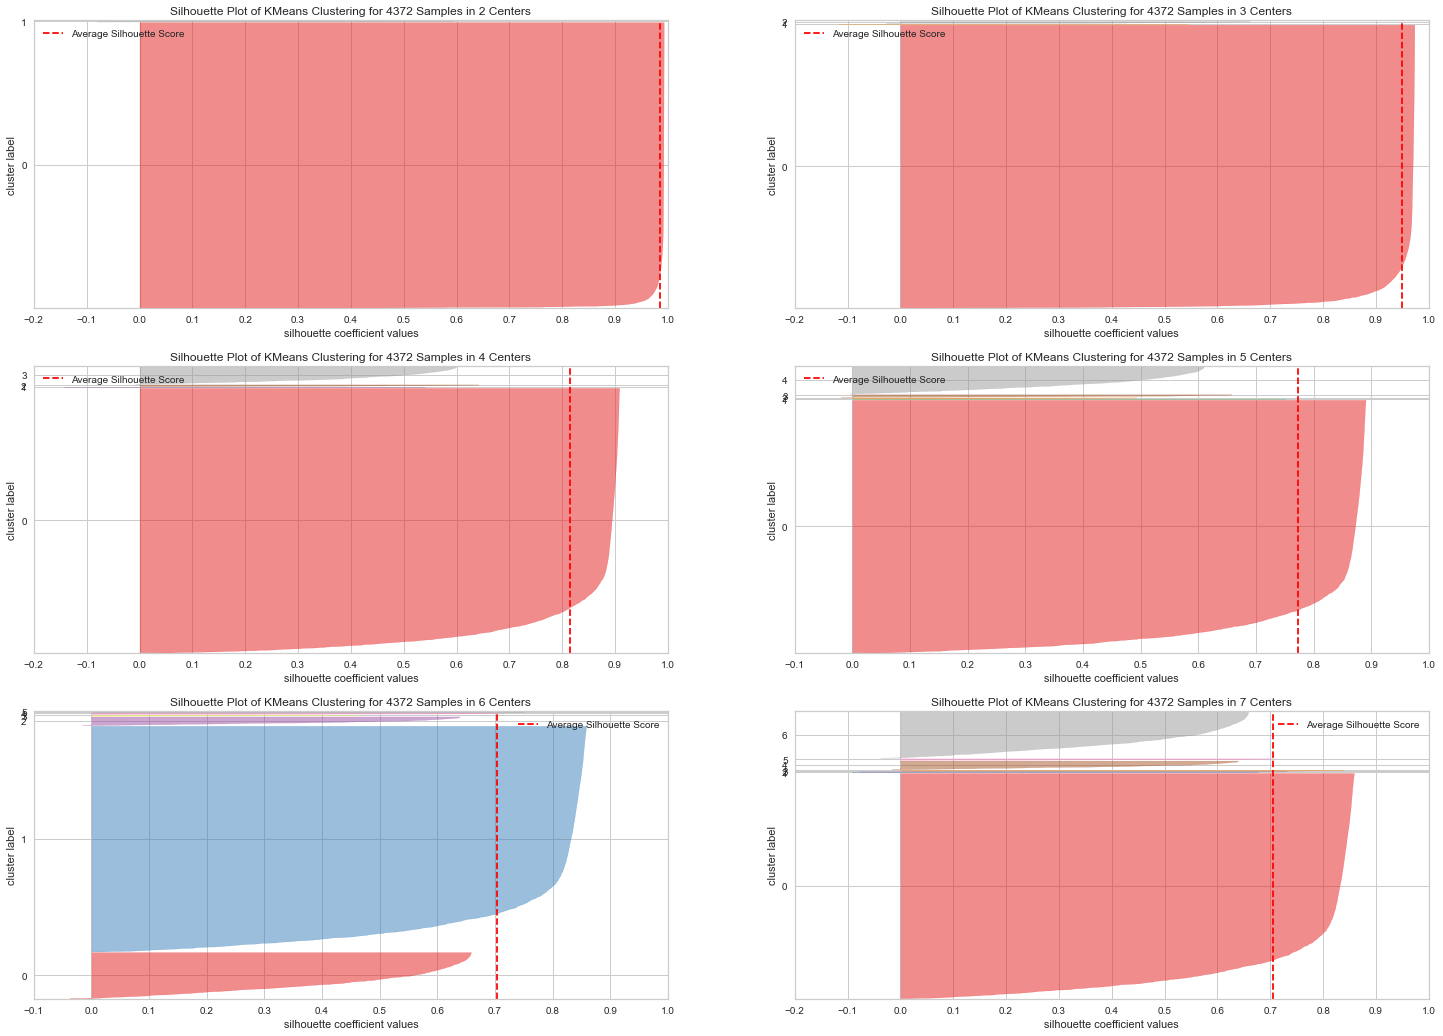

In [38]:
fig, ax = plt.subplots(3,2, figsize=(25, 18))
for k in clusters:
    km = c.KMeans(n_clusters=k, init='random', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(k, 2)
    
    visualizer = SilhouetteVisualizer(km, color= 'yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)
    visualizer.finalize()

# <font color='red'> 9.0. Model Training </font>

## 9.1. K-Means

In [39]:
# Model Definition
k = 4
kmeans = c.KMeans(init='random',n_clusters=k, n_init=10, max_iter=300, random_state=42)

#model training
kmeans.fit(X)

#clustering
labels = kmeans.labels_

## 9.2. Cluster Validation

In [40]:
# WSS
print(f'WSS values: {kmeans.inertia_}')
print(f"SS value: {m.silhouette_score(X, labels, metric='euclidean')}")

WSS values: 40056506734.60248
SS value: 0.8139972028952444


# <font color='red'> 10.0. Cluster Analysis </font>

In [41]:
df10 = df6.copy()
df10['cluster'] = labels
df10.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket,cluster
0,17850,5288.63,302,35,16.950737,3
1,13047,3079.10,31,18,15.709694,0
2,12583,7187.34,2,18,28.634821,3
3,13748,948.25,95,5,33.866071,0
4,15100,635.10,330,6,105.850000,0


## 10.1. Visualization Inspection

In [42]:
#fig = px.scatter_3d(df10, x= 'recency_days', y='invoice_no', z='gross_revenue', color='cluster')
#fig.show()

## 10.1. Visualization Inspection

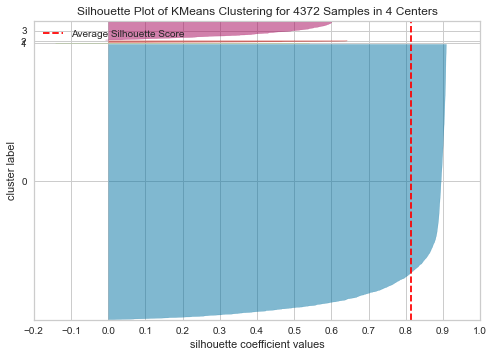

In [43]:
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X)
visualizer.finalize()

## 10.2. 2d plot

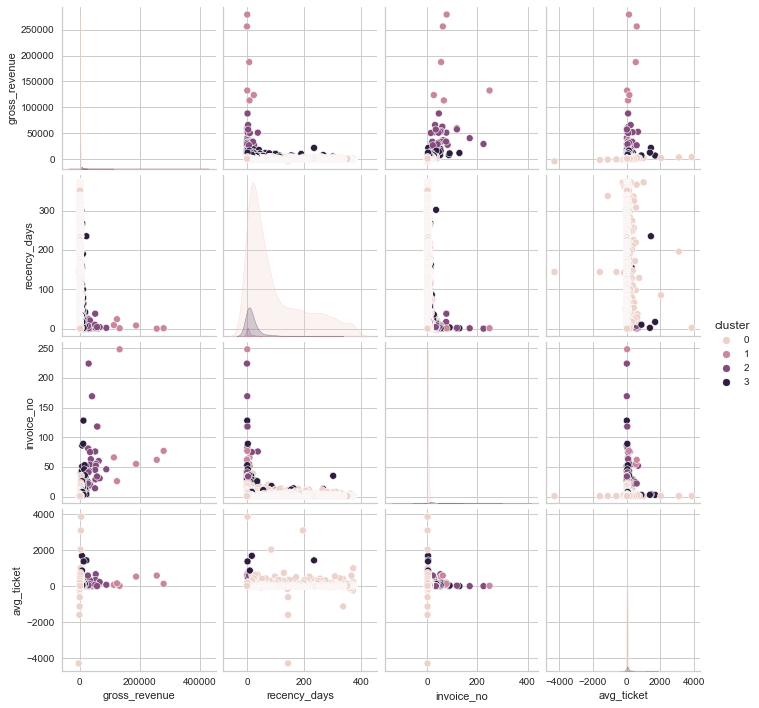

In [44]:
df_viz = df10.drop (columns='customer_id')
sns.pairplot(df_viz, hue='cluster')

## 10.3. UMAP - t-SNE

In [48]:
from sklearn.decomposition import PCA


In [62]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [63]:
embedding=pca.fit_transform(X)
df_viz['embedding_x'] = embedding[:,0]
df_viz['embedding_y'] = embedding[:,1]

In [64]:
df_viz

,gross_revenue,recency_days,invoice_no,avg_ticket,cluster,embedding_x,embedding_y
0,5288.63,302,35,16.950737,3,3389.812261,11.878892
1,3079.10,31,18,15.709694,0,1180.715744,17.474595
2,7187.34,2,18,28.634821,3,5289.014293,13.641003
3,948.25,95,5,33.866071,0,-950.201625,-7.019114
4,635.10,330,6,105.850000,0,-1263.583826,-87.208700
...,...,...,...,...,...,...,...
4367,196.89,1,1,16.407500,0,-1701.444806,11.977368
4368,343.50,1,1,19.083333,0,-1554.829879,9.593579
4369,360.00,1,1,180.000000,0,-1538.001965,-151.204280
4370,227.39,1,1,18.949167,0,-1670.939735,9.497519


<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

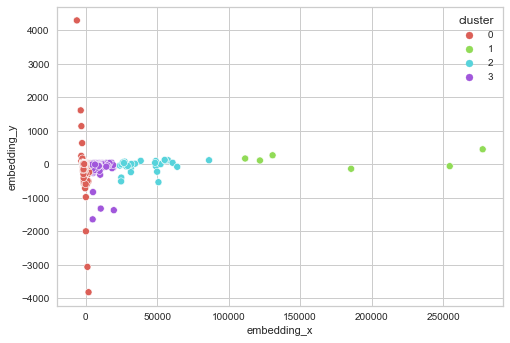

In [65]:
#reducer = UMAP(random_state=42)
#embedding = reducer.fit_transform(x)

#embedding
#df_viz['embedding_x'] = embedding[:,0]
#df_viz['embedding_y'] = embedding[:,1]

#plot UMAP

sns.scatterplot(x='embedding_x', y='embedding_y', 
                hue='cluster', 
                palette=sns.color_palette('hls', n_colors=len(df_viz['cluster'].unique())), 
                data = df_viz)

<AxesSubplot:xlabel='embedding_x2', ylabel='embedding_y2'>

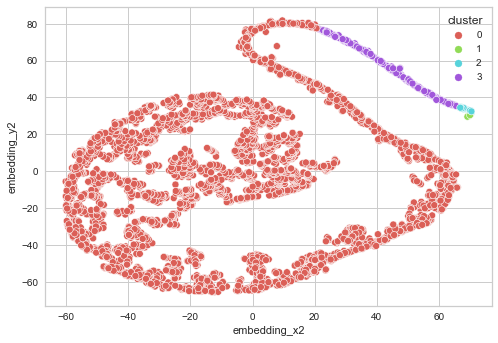

In [68]:
from sklearn.manifold import TSNE



tsne = TSNE(n_components=2, random_state=42)
embedding = tsne.fit_transform(X )
df_viz['embedding_x2'] = embedding[:,0]
df_viz['embedding_y2'] = embedding[:,1]
sns.scatterplot(x='embedding_x2', y='embedding_y2', 
                hue='cluster', 
                palette=sns.color_palette('hls', n_colors=len(df_viz['cluster'].unique())), 
                data = df_viz)

## 10.2. Cluster Profile

In [66]:
# Number of Cluster
df_cluster = df10[['customer_id', 'cluster']].groupby('cluster').count().reset_index()
df_cluster['perc_customer'] = 100* (df_cluster['customer_id'] / df_cluster['customer_id'].sum()).round(4)

# AVG Gross Revenue
df_avg_gross = df10[['gross_revenue', 'cluster']].groupby('cluster').mean().reset_index().round(4)
df_cluster = pd.merge(df_cluster, df_avg_gross, how='inner', on='cluster')

#AVG recency days
df_recency = df10[['recency_days', 'cluster']].groupby('cluster').mean().reset_index().round(4)
df_cluster = pd.merge(df_cluster, df_recency, how='inner', on='cluster')

#invoice
df_invoice = df10[['invoice_no', 'cluster']].groupby('cluster').mean().reset_index().round(4)
df_cluster = pd.merge(df_cluster, df_invoice, how='inner', on='cluster')

#AVG_ticket
df_ticket = df10[['avg_ticket', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_ticket, how='inner', on='cluster')


In [67]:
df_cluster.head()

,cluster,customer_id,perc_customer,gross_revenue,recency_days,invoice_no,avg_ticket
0,0,4071,93.12,946.6963,96.9693,3.6411,25.359654
1,1,6,0.14,182181.9817,7.1667,89.0000,253.626345
2,2,28,0.64,42614.3871,6.1786,57.8214,162.862605
3,3,267,6.11,8089.0287,20.2809,19.5281,62.783157


## Cluster 01 : (Candidato a Insider)
    - Número de customers :6 (0.14% do customers)
    - Recência em média :  7 dias
    - Compras em média :  89 compras
    - Receita em média : $182.182,00 dolares

## Cluster 01 : (Candidato a Insider)
    - Número de customers : 31 (0.7% do customers)
    - Recência em média : 14 dias
    - Compras em média : 53 compras
    - Receita em média : $40.543,52 dolares
    
## Cluster 01 : (Candidato a Insider)
    - Número de customers : 4.335 (99% do customers)
    - Recência em média : 92 dias
    - Compras em média : 5 compras
    - Receita em média : $ 1.372,57 dolares